In [295]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from sklearn.metrics import r2_score, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (roc_auc_score, roc_curve, auc, confusion_matrix, \
                             accuracy_score, classification_report, plot_confusion_matrix, \
                             plot_precision_recall_curve, precision_recall_curve, recall_score,
                             plot_roc_curve)


import warnings
warnings.filterwarnings('ignore')

In [296]:
import pickle
import random


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [297]:
DATA_ROOT = Path('C:/Users/operator/Desktop/Обучение ИИ/Классификация Библиотеки DS/Course project/Final version/' )
MODELS_PATH = Path('C:/Users/operator/Desktop/Обучение ИИ/Классификация Библиотеки DS/Course project/Final version/models/')

# input
TRAIN_DATASET_PATH = DATA_ROOT / 'train.csv'
TEST_DATASET_PATH = DATA_ROOT / 'test.csv'

# output
#TRAIN_FULL_PATH = DATA_ROOT / 'training_project_train_full.csv'
#TRAIN_PART_PATH = DATA_ROOT / 'training_project_train_part_b.csv'
#TEST_PART_PATH = DATA_ROOT / 'training_project_test_part.csv'

SCALER_FILE_PATH = MODELS_PATH / 'scaler.pkl'

In [298]:
df = pd.read_csv(TRAIN_DATASET_PATH)
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [300]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


**Описание признаков**

**Home Ownership** - домовладение\
**Annual Income** - годовой доход\
**Years in current job** - количество лет на текущем месте работы\
**Tax Liens** - налоговые обременения\
**Number of Open Accounts** - количество открытых счетов\
**Years of Credit History** - количество лет кредитной истории\
**Maximum Open Credit** - наибольший открытый кредит\
**Number of Credit Problems** - количество проблем с кредитом\
**Months since last delinquent** - количество месяцев с последней просрочки платежа\
**Bankruptcies** - банкротства\
**Purpose** - цель кредита\
**Term** - срок кредита\
**Current Loan Amount** - текущая сумма кредита\
**Current Credit Balance** - текущий кредитный баланс\
**Monthly Debt** - ежемесячный долг\
**Credit Score** - баллы кредитного рейтинга\
**Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

## Рассмотрим подробнее целевую переменную

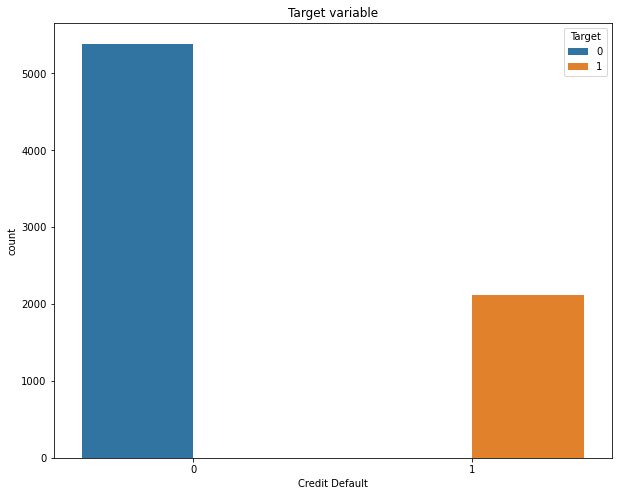

In [301]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Credit Default", hue="Credit Default", data=df)
plt.title('Target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

In [302]:
df['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

* видим дисбаланс классов

## Посмотрим на другие признаки

### Признаки с пропусками

* #### Annual Income имеет 1557 пропусков, поработаем с ними

создадим новый столбец, в котором отметим пропущенные значения

In [303]:
df['Annual Income Nan'] = 0
df.loc[df['Annual Income'].isna(), 'Annual Income Nan'] = 1

Заменим пропуски (пробовал самые разные варианты, включая предсказательные модели, но лучший результат дала замена пропусков годового дохода на медиану по типу жилья)

In [304]:
for i in list(df['Home Ownership'].unique()):
    print(f"for type {i} annual income value is {df['Annual Income'][df['Home Ownership'] == i].median()}")

for type Own Home annual income value is 961590.0
for type Home Mortgage annual income value is 1370869.0
for type Rent annual income value is 1010724.0
for type Have Mortgage annual income value is 1112013.0


In [305]:
for i in df[df['Annual Income'].isna()].index:
    if df.loc[i,'Home Ownership'] == 'Home Mortgage':
        df.loc[i, 'Annual Income'] = 1370869.0
    elif df.loc[i,'Home Ownership'] == 'Own Home':
        df.loc[i, 'Annual Income'] = 961590.0
    elif df.loc[i,'Home Ownership'] == 'Rent':
        df.loc[i, 'Annual Income'] = 1010724.0
    elif df.loc[i,'Home Ownership'] == 'Have Mortgage':
        df.loc[i, 'Annual Income'] = 1112013.0

* #### Years in current job имеет 371 пропуск, поработаем с ними

Рассматривал разные варианты, в итоге заменил в соответствии со значением Years of Credit History. В любом случае, далее в рамках оценки данного признака с помощью Хи-квадрат принял решение убрать его из признаков для построения предсказательной модели Credit Default, но в модели для предсказания Credit Score признак используется.

In [306]:
for i in df[df['Years in current job'].isna()].index:
    if df.loc[i,'Years of Credit History'] < 10:
        df.loc[i, 'Years in current job'] = '2 years'
    else:
        df.loc[i, 'Years in current job'] = '10+ years'

* #### Months since last delinquent имеет 4081 пропуск. Логичнее всего заменить пропуски на нули (не имели ранее просрочек). Но на кросс-валидациях этот признак всегда ухудшал предсказание Credit Default, поэтому убрал его из модели для Credit Default. Для предсказательной модели Credit Score данный признак полезен.

In [307]:
df['Months since last delinquent'] = df['Months since last delinquent'].fillna(0)

* #### Bankruptcies имеет 14 пропусков. Заменим их на моду (0)

In [308]:
df['Bankruptcies'].mode()

0    0.0
dtype: float64

In [309]:
df['Bankruptcies'] = df['Bankruptcies'].fillna(0)

* #### Так как для заполнения пропусков признака Credit Score я делал предсказательную модель, сначала обработаем выбросы

* #### Признак Current Loan Amount имеет 870 выбросов. Создадим отдельный столбец, чтобы запомнить наблюдения с данными выбросами

In [310]:
df['Current Loan Amount'][df['Current Loan Amount'] > 10000000].value_counts()

99999999.0    870
Name: Current Loan Amount, dtype: int64

In [311]:
df['Current Loan Amount Outliers'] = 0

for i in df.index:
    if df.loc[i, 'Current Loan Amount'] > 10000000:
        df.loc[i, 'Current Loan Amount Outliers'] = 1

Посмотрим, как наблюдния с этими выбросами согласуются с целевой переменной. Обнаружим, что для всех таких наблюдений значение Credit Default = 0

In [312]:
df['Credit Default'][df['Current Loan Amount Outliers'] == 1].value_counts()

0    870
Name: Credit Default, dtype: int64

в итоге решил не добавлять признак Current Loan Amount Outliers в модель, а просто обнулить все значения Credit Default в предсказаниях для наблюдений с выбросом в Current Loan Amount. Если оставить признак Current Loan Amount Outliers для модели, то он становится очень значимым для модели и на нем она сильно переобучается.

Для замены выбросов я использовал новый признак: Доля ежемесячного платежа в размере текущего кредите (Monthly Payment Share In Current Loan)

In [313]:
df['Monthly Payment Share In Current Loan'] = df['Monthly Debt'] / df['Current Loan Amount']

Далее я нашел медианные значения признака Monthly Payment Share In Current Loan для коротких и длинных кредитов

In [314]:
mont_paym_short_share = df['Monthly Payment Share In Current Loan'][(df['Term'] == 'Short Term') & \
                                                                   (df['Current Loan Amount'] < 10000000)].median()
mont_paym_long_share = df['Monthly Payment Share In Current Loan'][(df['Term'] == 'Long Term') & \
                                                                   (df['Current Loan Amount'] < 10000000)].median()

mont_paym_short_share, mont_paym_long_share

(0.06423832331425769, 0.04643290453625686)

Используя полученные метрики заменил выбросы Current Loan Amount

In [315]:
for i in df[df['Current Loan Amount'] > 10000000].index:
    if df.loc[i, 'Term'] == 'Short Term':
        df.loc[i, 'Current Loan Amount'] = df.loc[i, 'Monthly Debt'] / mont_paym_short_share
    elif df.loc[i, 'Term'] == 'Long Term':
        df.loc[i, 'Current Loan Amount'] = df.loc[i, 'Monthly Debt'] / mont_paym_long_share

* #### Признак Monthly Debt также имеет выбросы (нулевые значения). Заменим выбросы и обновим признак Monthly Payment Share In Current Loan с учетом новых значений Monthly Debt

In [316]:
for i in df[df['Monthly Debt'] == 0].index:
    if df.loc[i, 'Term'] == 'Short Term':
        df.loc[i, 'Monthly Debt'] = df.loc[i, 'Current Loan Amount'] * mont_paym_short_share
    elif df.loc[i, 'Term'] == 'Long Term':
        df.loc[i, 'Monthly Debt'] = df.loc[i, 'Current Loan Amount'] * mont_paym_long_share

In [317]:
df['Monthly Payment Share In Current Loan'] = df['Monthly Debt'] / df['Current Loan Amount']

* #### Последний признак с пропусками - Credit Score. Таких пропусков - 1557, кроме того, они в тех же наблюдениях, что и пропуски в Annual income, которые ранее заполнили. Новый признак для отображения пропусков Credit Score не создаю,т.к. они аналогичны пропускам годового дохода.

Кроме пропусков в данном признаке есть выбросы. Вообще, значения Credit Score попадают в диапазон (585 - 751). Имеются выборосы в которых в конце ошибочно добавлен 0. Их нужно разделить на 10.

In [318]:
for i in df[df['Credit Score'] > 1000].index:
    df.loc[i, 'Credit Score'] =  df.loc[i, 'Credit Score'] // 10

Из всех способов заполнения пропусков Credit Score, лучшие результаты на валидациях показала предсказательная модель на базе CatBoost

In [319]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2_score(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )

In [320]:
cb_cs = catb.CatBoostRegressor()
df_cs = df[df['Credit Score'].isna() == False]

In [321]:
X = df_cs.drop(['Credit Score', 'Credit Default', 'Tax Liens'], axis=1)
y = df_cs['Credit Score']

In [322]:
X.columns

Index(['Home Ownership', 'Annual Income', 'Years in current job',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Purpose', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Annual Income Nan', 'Current Loan Amount Outliers',
       'Monthly Payment Share In Current Loan'],
      dtype='object')

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_train.shape, X_test.shape

((4754, 17), (1189, 17))

In [324]:
cb_cs.fit(X_train, y_train, cat_features=['Home Ownership', 'Years in current job', 'Purpose', 'Term'], silent=True)

In [325]:
y_train_preds = cb_cs.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.65
RMSE:	16.752
MSE:	280.625


In [326]:
y_test_preds = cb_cs.predict(X_test)
evaluate_preds(y_test, y_test_preds)

R2:	0.345
RMSE:	21.436
MSE:	459.49


Значение R2 низкое, но если посмотреть на абсолютное отклонение RMSE ~ 21.4 на тесте, это удовлетворительно для предсказания величины с разбросом от 585 до 751

* Предсказываем и заполняем пропуски

In [327]:
df_cs_isna = df[df['Credit Score'].isna()]
X_fact = df_cs_isna.drop(['Credit Score', 'Credit Default', 'Tax Liens'], axis=1)

In [328]:
y_fact = cb_cs.predict(X_fact)
y_fact = np.clip(y_fact, a_min=585, a_max=751)

In [329]:
k = 0
for i in df.loc[df['Credit Score'].isna()].index:
    df.loc[i, 'Credit Score'] = y_fact[k]
    k += 1

## Новые признаки

В дополнение к созданным выше новым признакам добавим еще  один

* #### Признак долговой нагрузки по текущему кредиту (размер ежемесячного платежа по кредиту / размер месячного дохода)

In [330]:
df['Debt Share in Monthly Income'] = df['Monthly Debt'] / (df['Annual Income'] / 12)

## Проанализируем признаки

In [331]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df.columns.drop(TARGET_NAME).tolist()

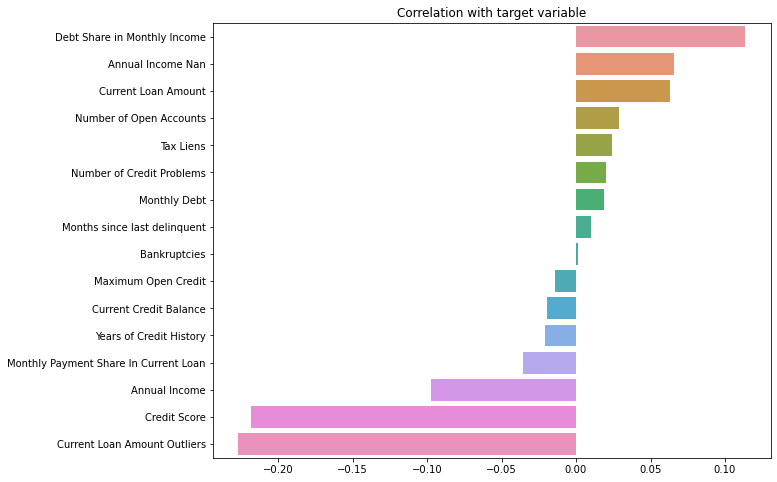

In [332]:
corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

Преобразуем признак Tax Liens из вещественного в категориальный признак (у него ограниченное количество значений)

In [333]:
df['Tax Liens'] = df['Tax Liens'].astype(str)

### Оценим категориальные признаки по критерию хи-квадрат

* #### Признак Term

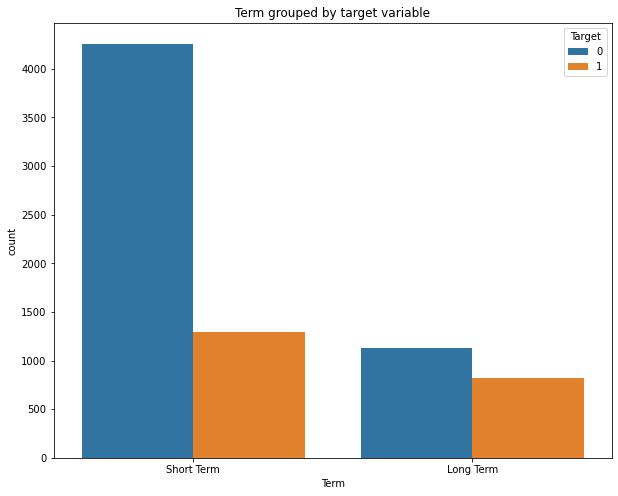

In [334]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Term", hue=TARGET_NAME, data=df)
plt.title('Term grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

По графику видно, что частотность по целевой переменной не совпадает, можно не считать хи-квадрат и так понятно, что оба значения признака Term имеют разное влияние на целевую переменную.

* #### Признак Home Ownership

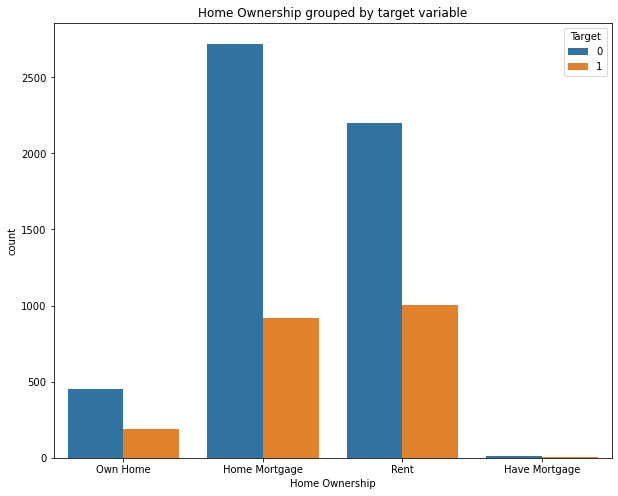

In [335]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Home Ownership", hue=TARGET_NAME, data=df)
plt.title('Home Ownership grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

по графику похожую частоту относительно целевой переменной имеют признаки Own Home, Rent и Have Mortgage, проверим гипотезу: альфа = 0,05

In [336]:
df['Id'] = df.index
home_ow_and_target_s = df.loc[df['Home Ownership'].isin(['Own Home', 'Rent', 'Have Mortgage']), ['Id', 'Home Ownership', 'Credit Default']]

In [337]:
table = home_ow_and_target_s.pivot_table(values='Id', index='Home Ownership', columns='Credit Default', aggfunc='count')
table

Credit Default,0,1
Home Ownership,,
Have Mortgage,10,2
Own Home,455,192
Rent,2201,1003


In [338]:
chi2, p, _, _ = chi2_contingency(table)
p

0.4020497430170807

p-value больше значения альфа, значит можно принять гипотезу, что признак Home Ownership можно разделить на бинарный признак: в одной части - Home Mortgage, в остальной - все остаьные категории. Но на кросс-валидациях такое изменение давало отрицательный вклад в модель, поэтому так делать не стал.

* #### Признак Years in current job

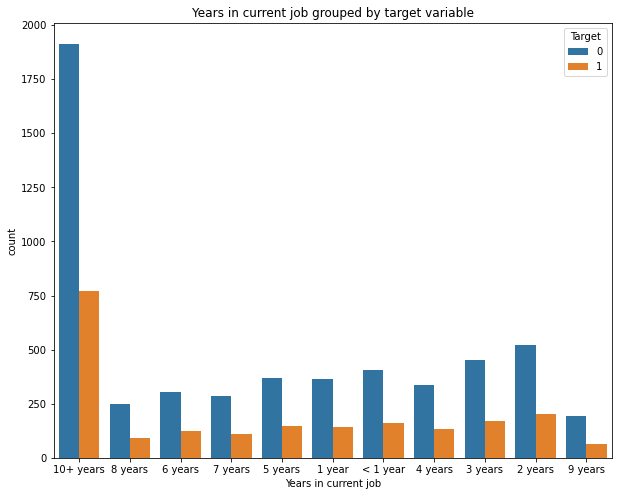

In [339]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Years in current job", hue=TARGET_NAME, data=df)
plt.title('Years in current job grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

по графику похожую частоту имеют все категории данного признака, проверим гипотезу, что данный признак не актуален для классификации по целевой переменной: альфа = 0,05

In [340]:
job_years_and_target_s = df.loc[df['Years in current job'].isin(['10+ years', '9 years', '8 years', '7 years','6 years',\
                            '5 years','4 years', '3 years', '2 years', '1 year','< 1 year' ]),\
                                ['Id', 'Years in current job', 'Credit Default']]
table = job_years_and_target_s.pivot_table(values='Id', index='Years in current job', columns='Credit Default', aggfunc='count')
table

Credit Default,0,1
Years in current job,,
1 year,362,142
10+ years,1914,772
2 years,520,202
3 years,450,170
4 years,338,131
5 years,371,145
6 years,302,124
7 years,285,111
8 years,247,92


In [341]:
chi2, p, _, _ = chi2_contingency(table)
p

0.9944466262409158

близкое к единице значение p-value говорит, что действительно данный признак никак не помогает классифицировать объекты по целевой переменной. Не будем использовать его для модели.

* #### Признак Tax Liens

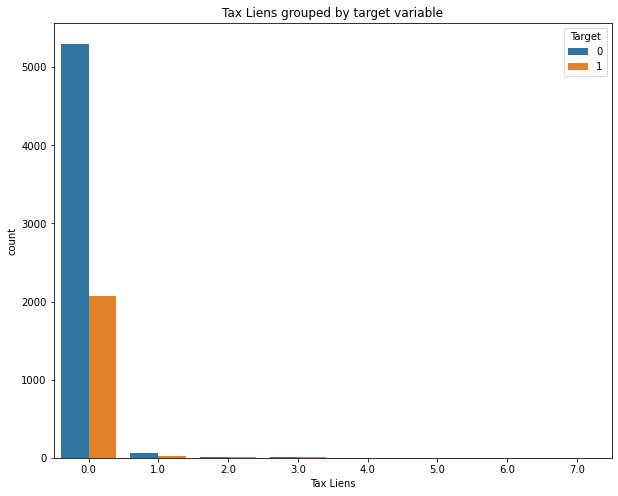

In [342]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Tax Liens", hue=TARGET_NAME, data=df)
plt.title('Tax Liens grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

по графику похожую частоту имеют категории 0.0 и 1.0, другая группа - 2.0,3.0, 4.0, 5.0. Проверим данные гипотезы: альфа = 0,05

In [343]:
tax_and_target_s = df.loc[df['Tax Liens'].isin(['0.0', '1.0']), ['Id', 'Tax Liens', 'Credit Default']]

In [344]:
table = tax_and_target_s.pivot_table(values='Id', index='Tax Liens', columns='Credit Default', aggfunc='count')
table

Credit Default,0,1
Tax Liens,,
0.0,5301,2065
1.0,59,24


In [345]:
chi2, p, _, _ = chi2_contingency(table)
p

0.956212700856196

высокое значение p-value говорит, что категории 0.0 и 1.0 можно объединить в одну

In [346]:
tax_and_target_s = df.loc[df['Tax Liens'].isin(['2.0', '3.0', '4.0', '5.0']), ['Id', 'Tax Liens', 'Credit Default']]

In [347]:
table = tax_and_target_s.pivot_table(values='Id', index='Tax Liens', columns='Credit Default', aggfunc='count')
table

Credit Default,0,1
Tax Liens,,
2.0,15,15
3.0,5,5
4.0,3,3
5.0,1,1


In [348]:
chi2, p, _, _ = chi2_contingency(table)
p

1.0

высокое значение p-value говорит, что категории 2.0, 3.0, 4.0 и 5.0 можно объединить в одну

По факту подобные объединения на лучшей модели не привели к улучшению, поэтому объединять категории в этом признаке не стал.

## Построение модели

In [349]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [350]:
def evaluate_preds(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [351]:
disbalance = df['Credit Default'].value_counts()[0] / df['Credit Default'].value_counts()[1]
disbalance

2.549455750118315

In [352]:
cb = catb.CatBoostClassifier(cat_features=['Home Ownership', 'Tax Liens', 'Purpose', 'Term'], silent=True,
                                max_depth=2, class_weights=[1, disbalance], reg_lambda = 0.0001, eval_metric='F1')
X = df.drop(['Credit Default', 'Months since last delinquent', 'Bankruptcies', 'Current Loan Amount Outliers', \
             'Id', 'Years in current job'], axis=1)
y = df['Credit Default']

In [353]:
X.columns

Index(['Home Ownership', 'Annual Income', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems', 'Purpose', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score', 'Annual Income Nan',
       'Monthly Payment Share In Current Loan',
       'Debt Share in Monthly Income'],
      dtype='object')

In [354]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=df['Credit Default'],\
                                                    random_state=42)

In [355]:
cb.fit(X_train,y_train, cat_features=['Home Ownership', 'Tax Liens', 'Purpose', 'Term'], silent=True)
evaluate_preds(cb, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.86      0.65      0.74      4310
           1       0.45      0.74      0.56      1690

    accuracy                           0.67      6000
   macro avg       0.66      0.69      0.65      6000
weighted avg       0.75      0.67      0.69      6000

TEST

              precision    recall  f1-score   support

           0       0.82      0.60      0.70      1077
           1       0.40      0.67      0.50       423

    accuracy                           0.62      1500
   macro avg       0.61      0.64      0.60      1500
weighted avg       0.70      0.62      0.64      1500

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               648  429
1               138  285


### Важность признаков

In [356]:
feature_importances = pd.DataFrame(zip(X_train.columns, cb.feature_importances_), columns=['feature', 'importance'])

feature_importances.sort_values(by='importance', ascending=False, inplace=True)

feature_importances

,feature,importance
14,Monthly Payment Share In Current Loan,56.360839
12,Credit Score,10.475112
5,Maximum Open Credit,4.654535
9,Current Loan Amount,4.240289
11,Monthly Debt,3.749265
15,Debt Share in Monthly Income,3.453433
1,Annual Income,2.692196
3,Number of Open Accounts,2.644580
7,Purpose,2.517132
8,Term,2.123870


## Посмотрим на различные метрики модели

* Accuracy

In [357]:
y_train_preds = cb.predict(X_train)
y_test_preds = cb.predict(X_test)
accuracy_train = accuracy_score(y_train, y_train_preds)
accuracy_test = accuracy_score(y_test, y_test_preds)
print(f'Accuracy на трейне {accuracy_train}')
print(f'Accuracy на тесте {accuracy_test}')

Accuracy на трейне 0.6713333333333333
Accuracy на тесте 0.622


### Стратифицированная кросс-валидация

In [358]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV

In [359]:
cv = StratifiedKFold(n_splits=3, random_state=21, shuffle=True)

In [360]:
cv_score = cross_val_score(cb, X, y, scoring='f1', cv=cv )
cv_score

array([0.50106383, 0.52074689, 0.48730416])

In [361]:
cv_score.mean()

0.5030382925558664

### TP, TN, FP, FN на трейне и тесте

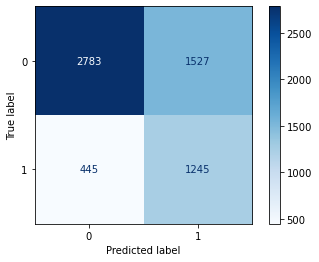

In [362]:
plot_confusion_matrix(cb, X_train, y_train, cmap=plt.cm.Blues);

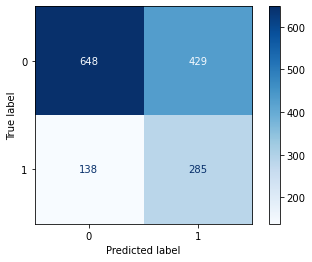

In [363]:
plot_confusion_matrix(cb, X_test, y_test, cmap=plt.cm.Blues);

### Определение оптимальной отсечки

In [364]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 9):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

In [365]:
y_test_pred_probs = cb.predict_proba(X_test)
y_test_pred_probs

array([[0.38457081, 0.61542919],
       [0.52339947, 0.47660053],
       [0.72593268, 0.27406732],
       ...,
       [0.36288467, 0.63711533],
       [0.42278623, 0.57721377],
       [0.31186128, 0.68813872]])

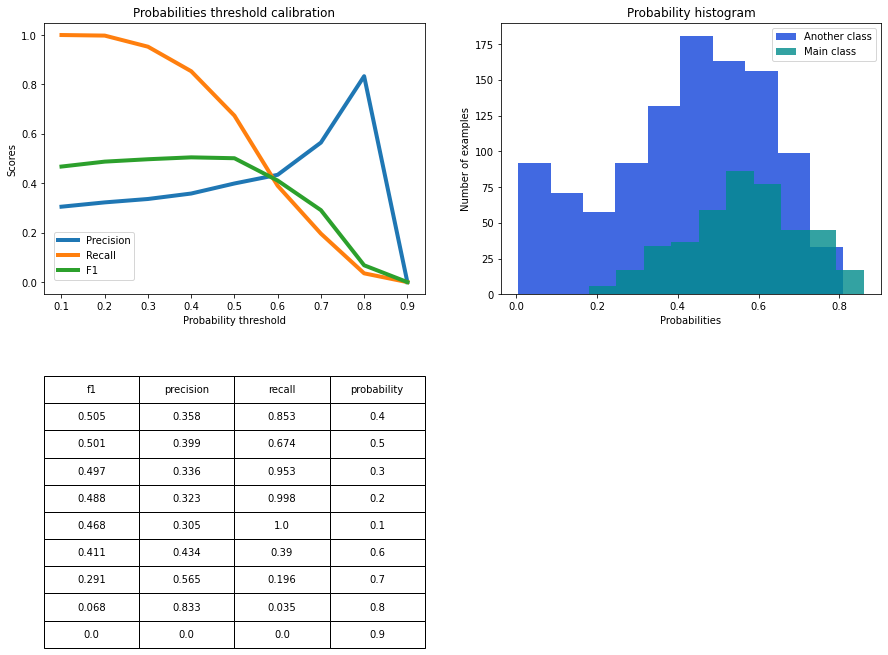

In [366]:
show_proba_calibration_plots(y_test_pred_probs[:, 1], y_test)

Лучший результат f1 при отсечке 0.4.

In [367]:
y_test_preds = cb. predict(X_test)
pred_proba_test = cb.predict_proba(X_test)

In [368]:
print(classification_report(y_test, y_test_preds))

              precision    recall  f1-score   support

           0       0.82      0.60      0.70      1077
           1       0.40      0.67      0.50       423

    accuracy                           0.62      1500
   macro avg       0.61      0.64      0.60      1500
weighted avg       0.70      0.62      0.64      1500



In [369]:
y_test_preds = np.where(pred_proba_test[:,1] >= 0.4, 1, 0)

In [370]:
print(classification_report(y_test, y_test_preds))

              precision    recall  f1-score   support

           0       0.87      0.40      0.55      1077
           1       0.36      0.85      0.50       423

    accuracy                           0.53      1500
   macro avg       0.62      0.63      0.53      1500
weighted avg       0.73      0.53      0.54      1500



за счет смещения отсечки метрика увеличилась, прежде всего, за счет сильного увеличения recall.  В финальном предсказании данной отсечкой не пользовался, т.к. для паблика на kaggle такая отсечка давала худший результат (считаю это частью кросс-валидации)

### ROC-кривая на валидационном датасете

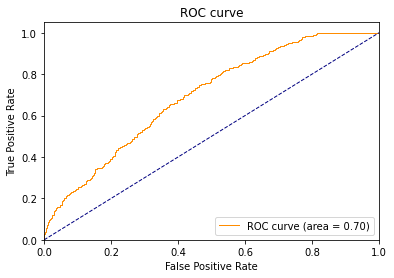

In [371]:
fpr, tpr, thresholds = roc_curve(y_test, pred_proba_test[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

0.7 - невысокий показатель, но с учетом количества и качества данных, вполне приемлемый

In [372]:
class ClassificatorPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        """Средняя доля ежемесячного платежа в сумме текущего кредита"""
        self.mont_paym_short_share = 0.0642
        self.mont_paym_long_share = 0.0464
        
        """Подмодель для Credit Score"""
        self.submodel = cb_cs
    
    def transform(self, df):
        """Трансформация данных"""
        
        #Annual Income Nan
        df['Annual Income Nan'] = 0
        df.loc[df['Annual Income'].isna(), 'Annual Income Nan'] = 1
        
        #Annual Income
        for i in df[df['Annual Income'].isna()].index:
            if df.loc[i,'Home Ownership'] == 'Home Mortgage':
                df.loc[i, 'Annual Income'] = 1370869.0
            elif df.loc[i,'Home Ownership'] == 'Own Home':
                df.loc[i, 'Annual Income'] = 961590.0
            elif df.loc[i,'Home Ownership'] == 'Rent':
                df.loc[i, 'Annual Income'] = 1010724.0
            elif df.loc[i,'Home Ownership'] == 'Have Mortgage':
                df.loc[i, 'Annual Income'] = 1112013.0
                
        # Years in current job     
        for i in df[df['Years in current job'].isna()].index:
            if df.loc[i,'Years of Credit History'] < 10:
                df.loc[i, 'Years in current job'] = '2 years'
            else:
                df.loc[i, 'Years in current job'] = '10+ years'
                
        # Months since last delinquent
        df['Months since last delinquent'] = df['Months since last delinquent'].fillna(0)
        
        # Bankruptcies 
        df['Bankruptcies'] = df['Bankruptcies'].fillna(0)
    
        #Current Loan Amount Outliers
        df['Current Loan Amount Outliers'] = 0
        for i in df.index:
            if df.loc[i, 'Current Loan Amount'] > 10000000:
                df.loc[i, 'Current Loan Amount Outliers'] = 1
        curr_loan_am_outl = df[df['Current Loan Amount Outliers'] == 1].index
        
        #Current Loan Amount
        for i in df[df['Current Loan Amount'] > 10000000].index:
            if df.loc[i, 'Term'] == 'Short Term':
                df.loc[i, 'Current Loan Amount'] = df.loc[i, 'Monthly Debt'] / self.mont_paym_short_share
            elif df.loc[i, 'Term'] == 'Long Term':
                df.loc[i, 'Current Loan Amount'] = df.loc[i, 'Monthly Debt'] / self.mont_paym_long_share
               
        # Monthly Debt outliers
        for i in df[df['Monthly Debt'] == 0].index:
            if df.loc[i, 'Term'] == 'Short Term':
                df.loc[i, 'Monthly Debt'] = df.loc[i, 'Current Loan Amount'] * self.mont_paym_short_share
            elif df.loc[i, 'Term'] == 'Long Term':
                df.loc[i, 'Monthly Debt'] = df.loc[i, 'Current Loan Amount'] * self.mont_paym_long_share
            
        # New feature: Monthly Payment Share In Current Loan
        df['Monthly Payment Share In Current Loan'] = df['Monthly Debt'] / df['Current Loan Amount']
        
        # Credit Score outliers
        for i in df[df['Credit Score'] > 1000].index:
            df.loc[i, 'Credit Score'] =  df.loc[i, 'Credit Score'] // 10
         
        # Credit Score Nan filling
        y_fact = self.submodel.predict(df[['Home Ownership', 'Annual Income', 'Years in current job',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Purpose', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Annual Income Nan', 'Current Loan Amount Outliers',
       'Monthly Payment Share In Current Loan']])
        y_fact = np.clip(y_fact, a_min=585, a_max=751)
        
        k = 0
        for i in df.loc[df['Credit Score'].isna()].index:
            df.loc[i, 'Credit Score'] = y_fact[k]
            k += 1
            

         # New feature: Debt Share in Monthly Income  
        df['Debt Share in Monthly Income'] = df['Monthly Debt'] / (df['Annual Income'] / 12) 
        
        df['Tax Liens'] = df['Tax Liens'].astype(str)
        
        return df

In [373]:
df = pd.read_csv(TEST_DATASET_PATH)
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [374]:
preprocessor = ClassificatorPreprocessing()
df = preprocessor.transform(df)

df.describe()

,Annual Income,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Annual Income Nan,Current Loan Amount Outliers,Monthly Payment Share In Current Loan,Debt Share in Monthly Income
count,2.500000e+03,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000,2.500000e+03,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1.328732e+06,11.184400,18.325920,7.105704e+05,0.162000,15.614000,0.106800,3.127377e+05,2.963966e+05,18271.340000,719.883993,0.205200,0.118800,0.077338,0.175248
std,8.252774e+05,4.852774,7.254659,1.511983e+06,0.559894,22.616348,0.356994,1.864251e+05,3.783020e+05,11543.881469,25.869798,0.403928,0.323618,0.092161,0.088918
min,1.065330e+05,1.000000,3.900000,0.000000e+00,0.000000,0.000000,0.000000,4.501558e+03,0.000000e+00,93.000000,585.000000,0.000000,0.000000,0.000562,0.001152
25%,9.365622e+05,8.000000,13.400000,2.785860e+05,0.000000,0.000000,0.000000,1.729365e+05,1.101145e+05,10024.750000,708.000000,0.000000,0.000000,0.039675,0.112002
50%,1.167569e+06,10.000000,17.000000,4.786760e+05,0.000000,0.000000,0.000000,2.699290e+05,2.073850e+05,16642.500000,726.000000,0.000000,0.000000,0.061575,0.171998
75%,1.488726e+06,14.000000,22.100000,8.025985e+05,0.000000,27.000000,0.000000,4.311945e+05,3.663485e+05,24146.000000,739.000000,0.000000,0.000000,0.080971,0.229134
max,1.497561e+07,48.000000,53.400000,5.448439e+07,15.000000,82.000000,5.000000,1.443384e+06,6.030087e+06,93555.000000,751.000000,1.000000,1.000000,1.782535,0.815902


In [375]:
X = df.drop(['Months since last delinquent', 'Bankruptcies', 'Current Loan Amount Outliers', \
             'Years in current job'], axis=1)

In [376]:
preds = cb.predict(X)
#pred_proba = cb.predict_proba(X)

In [377]:
#preds = np.where(pred_proba[:,1] >= 0.4, 1, 0)

In [378]:
df['Id'] = df.index
df['Credit Default'] = preds

submission = df[['Id','Credit Default']]

### Заменим на 0 значения Credit Default (в наблюдениях, где модель предсказала 1), где имели место выбросы Current Loan Amount (эту закономерность мы выявили на трейне). Таких предсказаний на тесте получилось 11.

In [379]:
df['Credit Default'][df['Current Loan Amount Outliers'] == 1].value_counts()

0    286
1     11
Name: Credit Default, dtype: int64

In [380]:
for i in df.index:
    if (df.loc[i, 'Credit Default'] == 1) & (df.loc[i, 'Current Loan Amount Outliers'] == 1):
        df.loc[i, 'Credit Default'] = 0

In [381]:
submission = df[['Id','Credit Default']]

In [382]:
submission.to_csv('C:/Users/operator/Desktop/Обучение ИИ/Классификация Библиотеки DS/Course project/final_submission.csv', index=False)